In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Show plots inline 
%matplotlib inline
sns.set(style='whitegrid')


In [2]:
# Load the sales dataset 
df = pd.read_csv ('../data/supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
#View column info and basic stats 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [4]:
#Check for any missing values 
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create new column 'Month'
df['Month'] = df['Date'].dt.to_period('M')

df[['Date', 'Month']].head()

,Date,Month
0,2019-01-05,2019-01
1,2019-03-08,2019-03
2,2019-03-03,2019-03
3,2019-01-27,2019-01
4,2019-02-08,2019-02


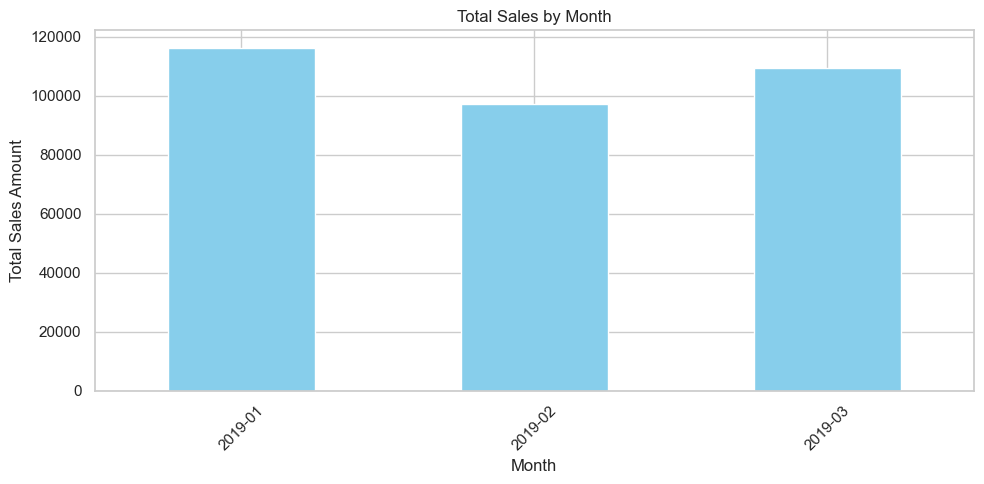

In [6]:
# Griup total sales by Month
monthly_sales = df.groupby('Month')['Total'].sum()

# Plot
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


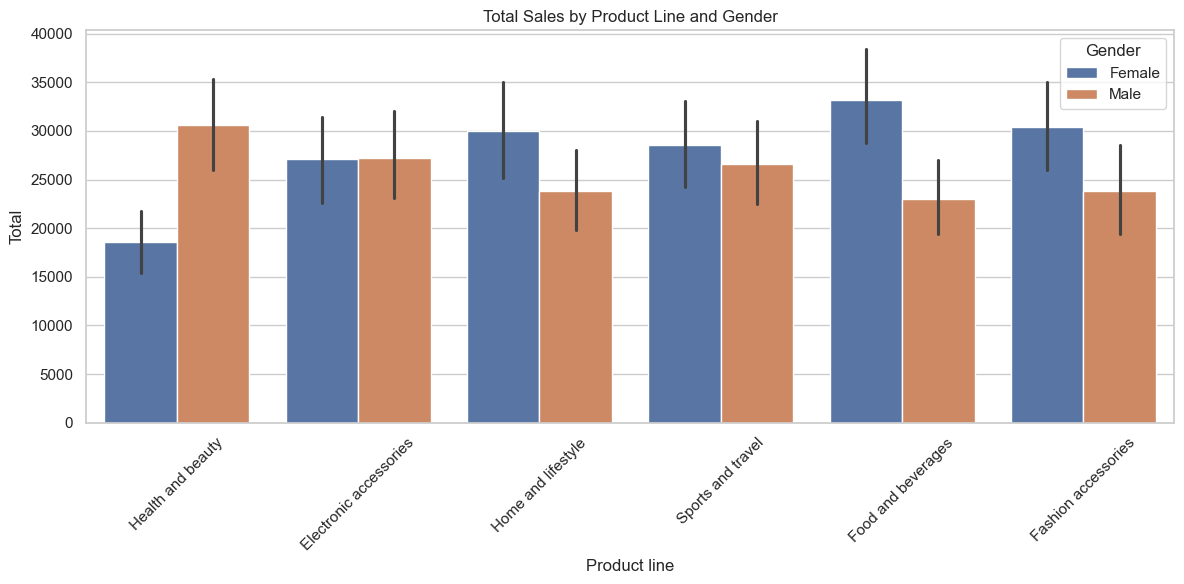

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Product line', y='Total', hue='Gender', estimator='sum')
plt.title('Total Sales by Product Line and Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

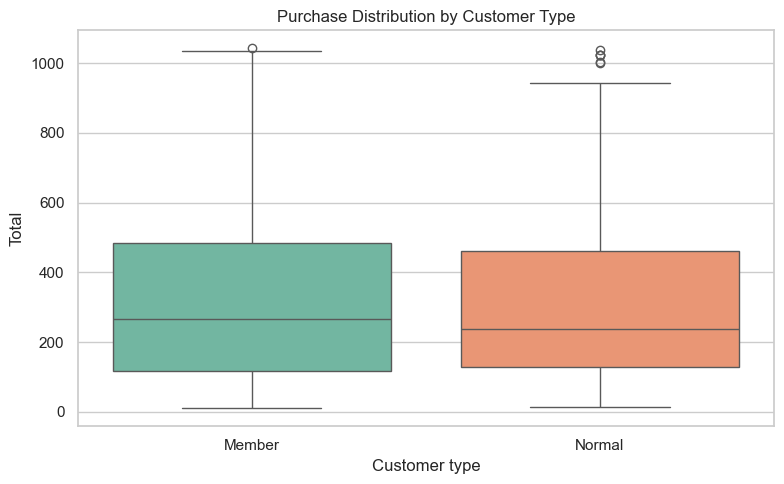

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Customer type', y='Total', hue='Customer type', palette='Set2', legend=False)
plt.title('Purchase Distribution by Customer Type')
plt.tight_layout()
plt.show()

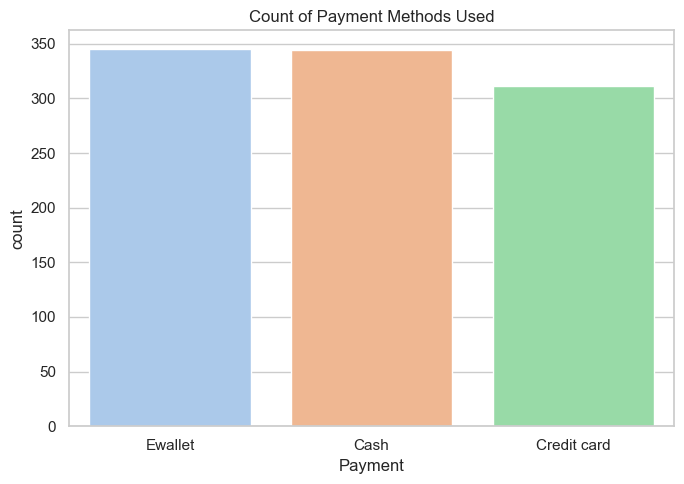

In [9]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Payment', hue='Payment', palette='pastel', order=df['Payment'].value_counts().index, legend=False)
plt.title('Count of Payment Methods Used')
plt.tight_layout()
plt.show()

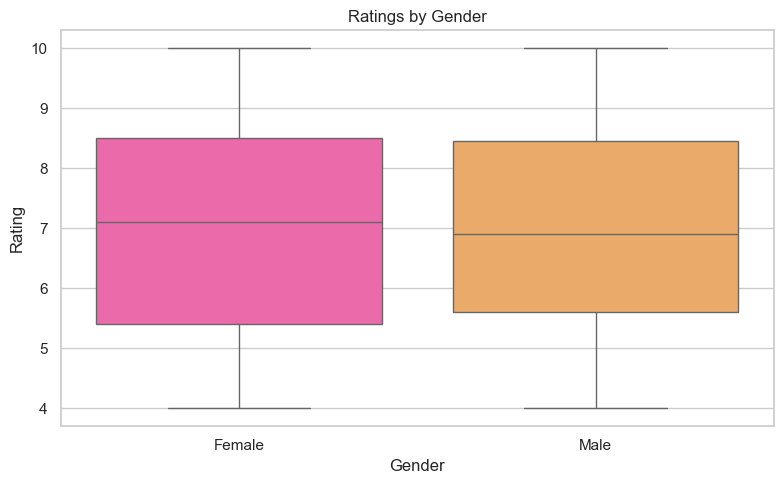

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='Rating', hue='Gender', palette='spring', dodge=False, legend=False)
plt.title('Ratings by Gender')
plt.tight_layout()
plt.show()

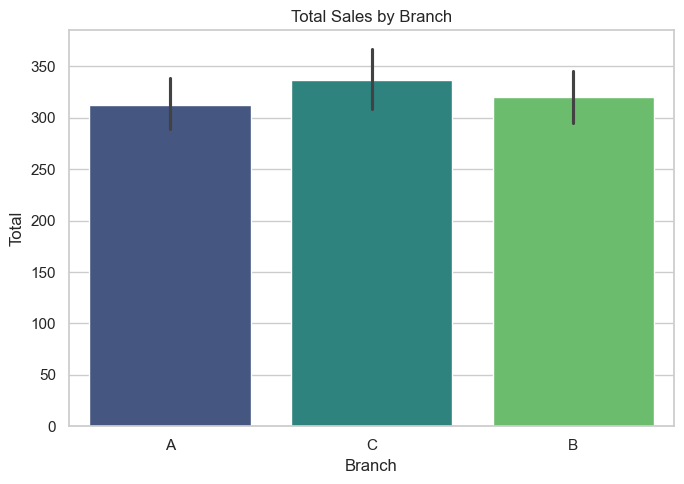

In [11]:
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x='Branch', y='Total', hue='Branch', palette='viridis', dodge=False, legend=False)
plt.title('Total Sales by Branch')
plt.tight_layout()
plt.show()

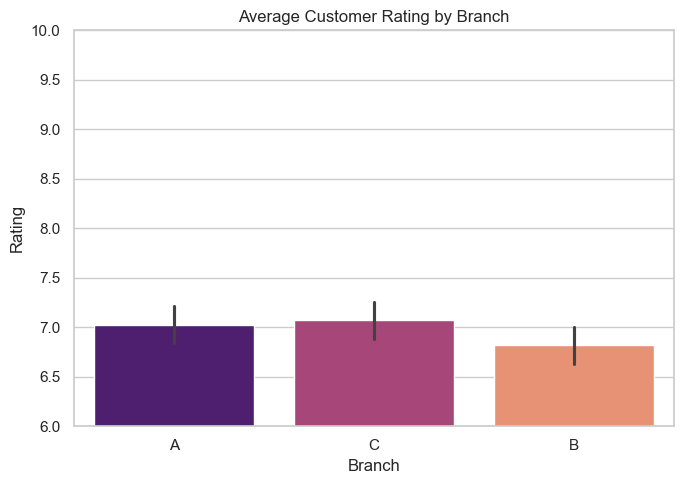

In [12]:
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x='Branch', y='Rating', hue='Branch', estimator='mean', palette='magma', dodge=False, legend=False)
plt.title('Average Customer Rating by Branch')
plt.ylim(6, 10)
plt.tight_layout()
plt.show()


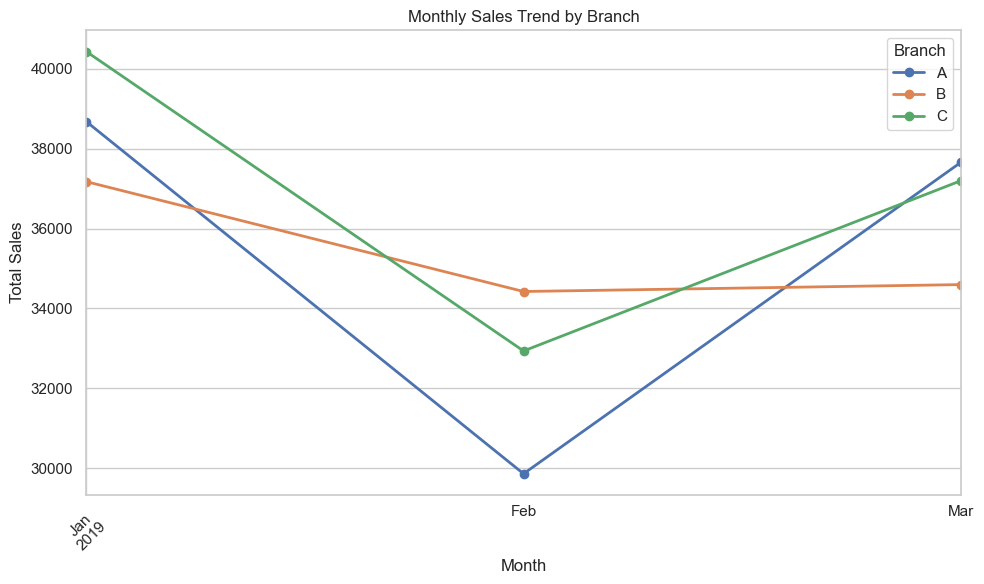

In [13]:
# Ensure Month column is in datetime format if not already
df['Month'] = df['Date'].dt.to_period('M')

# Group by Month and Branch, then unstack to get branches as columns
monthly_branch = df.groupby(['Month', 'Branch'])['Total'].sum().unstack()

# Plotting
monthly_branch.plot(kind='line', marker='o', figsize=(10, 6), linewidth=2)
plt.title('Monthly Sales Trend by Branch')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [15]:
# Select features and target
features = df[['Quantity', 'Unit price', 'Product line', 'Customer type', 'Gender', 'Payment']]
target = df['Total']

# One-hot encode categorical columns
encoded_features = pd.get_dummies(features, drop_first=True)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(encoded_features, target, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 6335.88
R² Score: 0.90


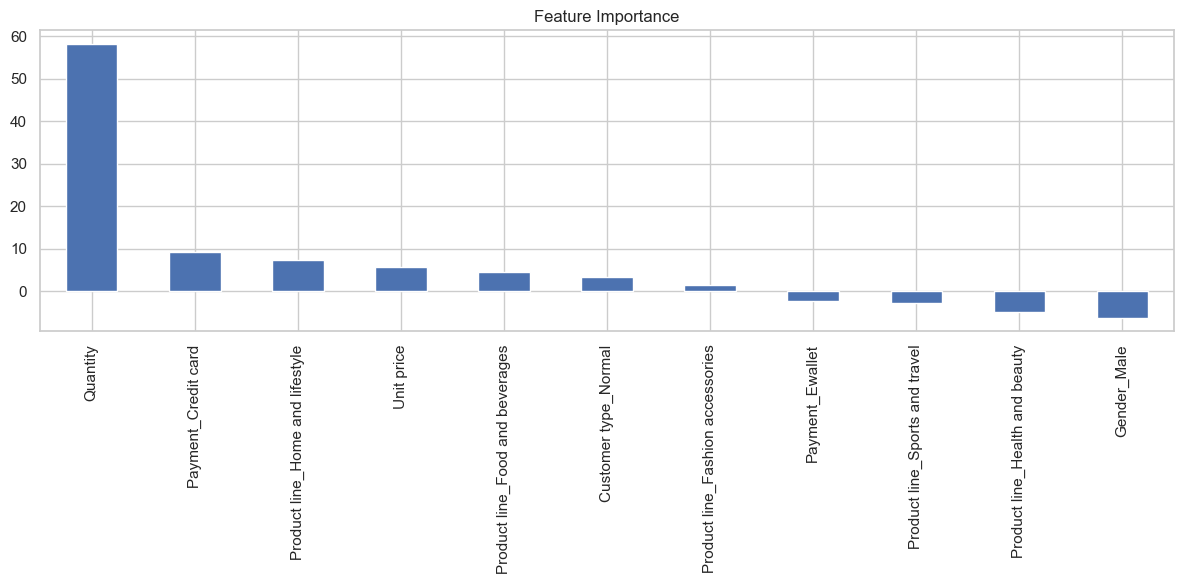

In [18]:
importance = pd.Series(model.coef_, index=encoded_features.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title='Feature Importance')
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd

# Corrected paths to match the folder structure
df_analysis = pd.read_csv('../data/SuperMarket Analysis.csv')
df_sales = pd.read_csv('../data/supermarket_sales.csv')
df_stores = pd.read_csv('../data/Stores.csv')
df_annex = pd.read_csv('../data/annex1.csv')

In [ ]:
print("📘 SuperMarket Analysis:")
display(df_analysis.head())

print("\n📊 Supermarket Sales:")
display(df_sales.head())

print("\n🏪 Stores:")
display(df_stores.head())

print("\n📎 Annex 1:")
display(df_annex.head())

📘 SuperMarket Analysis:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3



📊 Supermarket Sales:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3



🏪 Stores:


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620



📎 Annex 1:


,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


In [ ]:
print("🔹 df_analysis columns:", df_analysis.columns.tolist())
print("🔹 df_sales columns:", df_sales.columns.tolist())
print("🔹 df_stores columns:", df_stores.columns.tolist())
print("🔹 df_annex columns:", df_annex.columns.tolist())

🔹 df_analysis columns: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
🔹 df_sales columns: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
🔹 df_stores columns: ['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']
🔹 df_annex columns: ['Item Code', 'Item Name', 'Category Code', 'Category Name']


In [ ]:
print("🔹 df_annex columns:", df_annex.columns.tolist())
display(df_annex.head())

🔹 df_annex columns: ['Item Code', 'Item Name', 'Category Code', 'Category Name']


,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


In [ ]:
print(df_sales.columns)
print(df_annex.columns)
print(df_stores.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')
Index(['Item Code', 'Item Name', 'Category Code', 'Category Name'], dtype='object')
Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')


In [ ]:
# Sales per city
df_sales.groupby('City')['Total'].sum().sort_values(ascending=False)

# Ratings per branch
df_sales.groupby('Branch')['Rating'].mean().sort_values()

# Quantity vs Unit Price heatmap
sns.scatterplot(data=df_sales, x='Quantity', y='Unit price', hue='Product line')

<Axes: xlabel='Quantity', ylabel='Unit price'>

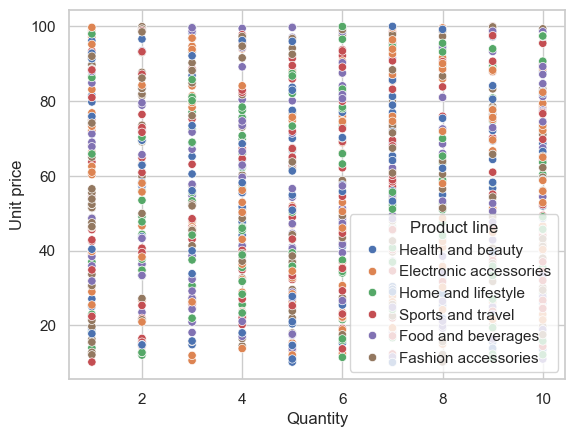

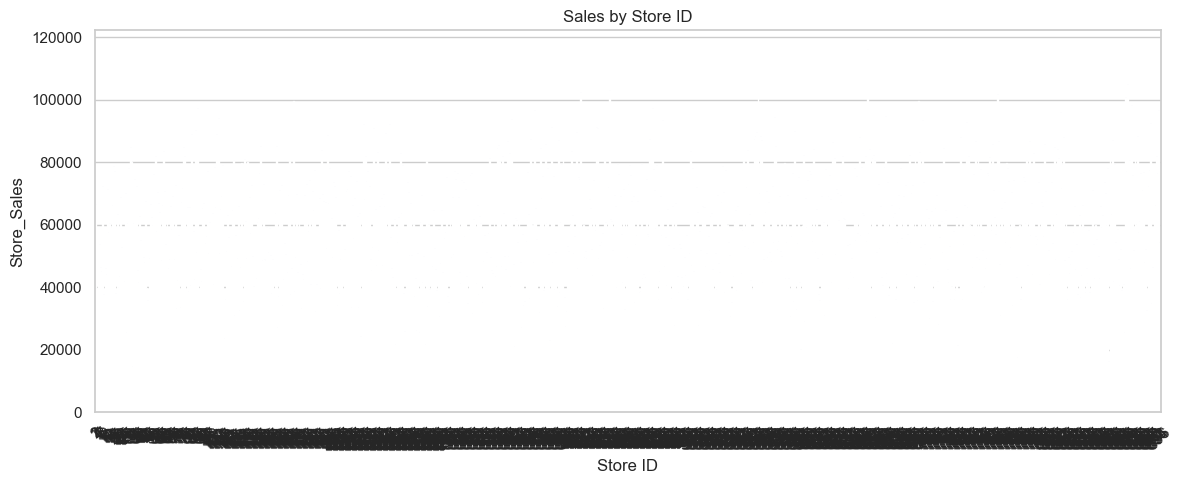

In [ ]:
# Step 1: Clean column name
df_stores.rename(columns={'Store ID ': 'Store ID'}, inplace=True)

# Step 2: Analyze
df_stores.describe()

# Step 3: Plot key metrics
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.barplot(data=df_stores, x='Store ID', y='Store_Sales')
plt.title('Sales by Store ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

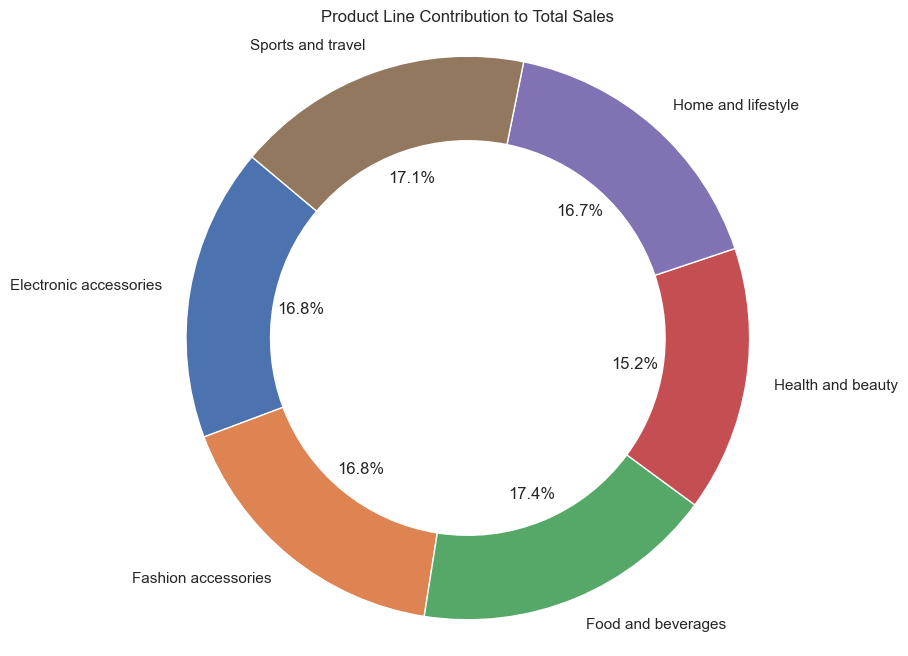

In [ ]:
sales_by_product = df_sales.groupby('Product line')['Total'].sum()

# Donut Chart
plt.figure(figsize=(8,8))
plt.pie(sales_by_product, labels=sales_by_product.index, autopct='%1.1f%%', startangle=140, wedgeprops={'width':0.3})
plt.title("Product Line Contribution to Total Sales")
plt.axis('equal')
plt.show()

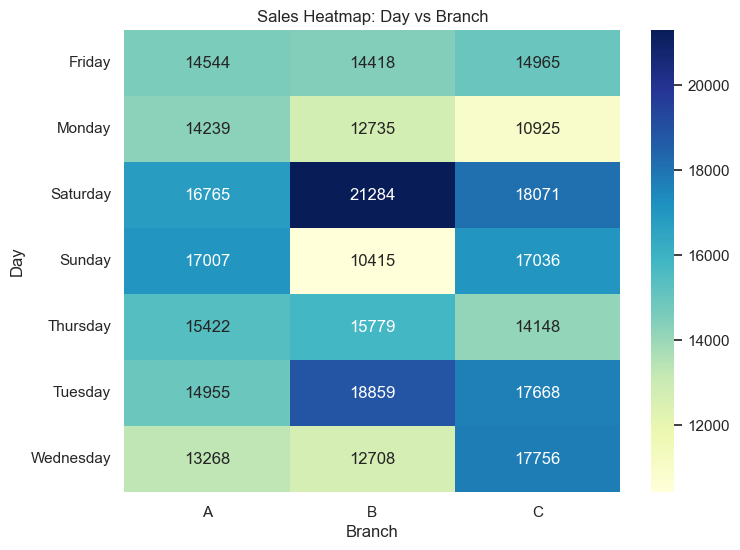

In [ ]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_sales['Day'] = df_sales['Date'].dt.day_name()

sales_day_branch = df_sales.pivot_table(index='Day', columns='Branch', values='Total', aggfunc='sum')

plt.figure(figsize=(8,6))
sns.heatmap(sales_day_branch, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Sales Heatmap: Day vs Branch')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_cluster = df_sales[['Gender', 'Product line', 'Total']].copy()

# Encode categorical columns
le_gender = LabelEncoder()
le_product = LabelEncoder()

df_cluster['Gender'] = le_gender.fit_transform(df_cluster['Gender'])
df_cluster['Product line'] = le_product.fit_transform(df_cluster['Product line'])

df_cluster.head()

,Gender,Product line,Total
0,0,3,548.9715
1,0,0,80.2200
2,1,4,340.5255
3,1,3,489.0480
4,1,5,634.3785


In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = "4"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
df_sales = pd.read_csv('supermarket_sales.csv')

In [ ]:
df_cluster = df_sales[['Gender', 'Product line', 'Total']].copy()

# Encode categorical columns
le_gender = LabelEncoder()
le_product = LabelEncoder()

df_cluster['Gender'] = le_gender.fit_transform(df_cluster['Gender'])
df_cluster['Product line'] = le_product.fit_transform(df_cluster['Product line'])

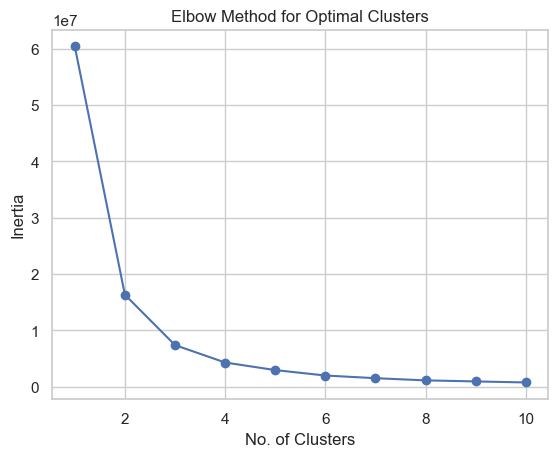

In [ ]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_cluster)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

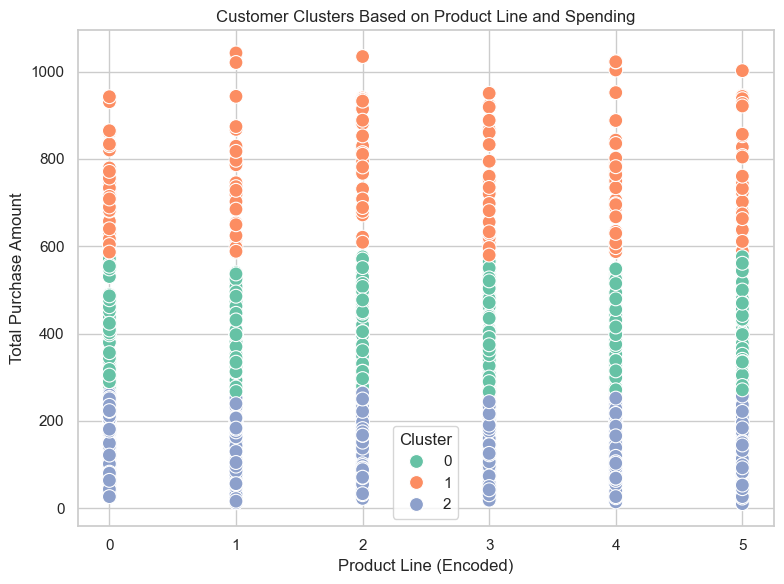

In [ ]:
# Apply KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_cluster,
    x='Product line', 
    y='Total', 
    hue='Cluster',
    palette='Set2',
    s=100
)
plt.title('Customer Clusters Based on Product Line and Spending')
plt.xlabel('Product Line (Encoded)')
plt.ylabel('Total Purchase Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

# Combine all product lines into a single string
all_products = " ".join(df['Product line'])

# Tokenize and count frequency
tokens = all_products.split()
word_freq = Counter(tokens)
print(word_freq)

Counter({'and': 652, 'accessories': 348, 'Fashion': 178, 'Food': 174, 'beverages': 174, 'Electronic': 170, 'Sports': 166, 'travel': 166, 'Home': 160, 'lifestyle': 160, 'Health': 152, 'beauty': 152})


<Figure size 800x600 with 0 Axes>

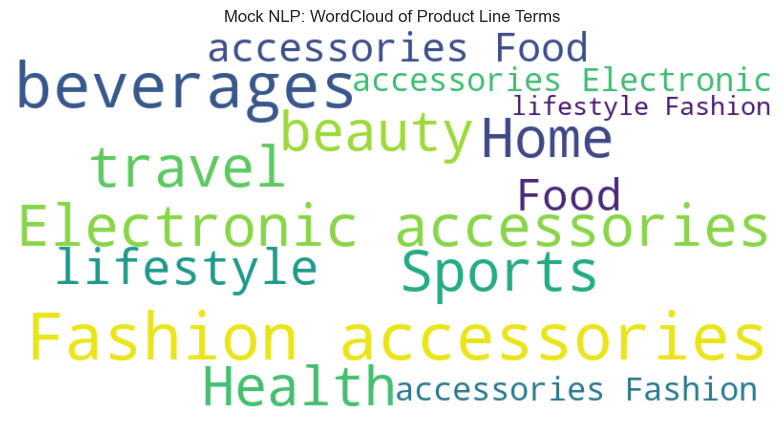

In [ ]:
plt.figure(figsize=(8, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_products)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Mock NLP: WordCloud of Product Line Terms")
plt.tight_layout()
plt.show()